# Adaboost

## Stump
에다부스트에서는 깊은 결정 트리가 아니라 root 노드 하나와 분류 노드 두 개를 갖는 얕은 결정트리를 만듦. 스텀프는 50%보다 조금 나은 성능을 갖게되고, 즉 weak learner를 사용함  

## Boosting 기법 과정
스텀프들로 데이터셋 학습 -> 틀리게 예측하면 데이터 중요도를 올려주고 맞게 예측하면 데이터 중요도를 낮춰줌. 반복해서 바로 전에 틀렸던 데이터들을 좀 더 잘 예측하는 스텀프를 만듦. 각 스텀프는 전에 있던 스텀프들의 실수를 바로잡는 방향으로 만들어줌.  
에다부스트는 다수결의 원칙이 아니라 성능 주의적으로 예측함  
1. 성능이 별로 좋지 않은 결정 스텀프들을 많이 만듦.  
2. 스텀프를 만들 때, 전 스텀프들이 예측에 틀린 데이터들의 중요도를 더 높게 설정해 줌.
3. 최종 결정을 내릴 때, 성능이 좋은 결정 스텀프들 예측 의견의 비중은 높고, 그렇지 않은 결정 스텀프의 의견의 비중은 낮게 반영.

In [1]:
# Adaboost by sciki-learn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

predictions, score

(array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
        0, 1, 1, 2, 1, 1, 1, 2]),
 0.8666666666666667)

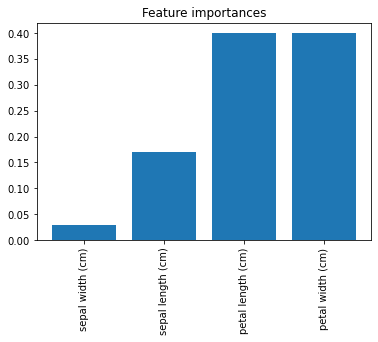

In [2]:
importances = model.feature_importances_

indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [3]:
# 실습과제_에다 부스트로 악성/양성 유방암 분류하기
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

model = AdaBoostClassifier(n_estimators=50, random_state=5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

predictions, score

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0]),
 0.9736842105263158)